# *Lab 2: Exploring Image Data*


### Buisness Understanding
_________________________

The dataset, **Car Images Dataset**, was gathered by author Kshitij Kumar and published on Kaggle, a platform for data science and machine learning practitioners, researchers, and enthusiasts. The dataset consists of various types of car images from the web in the form of JPEG files. Specifically, this dataset consists of 7 different types of vehicles and in total there are 4,165 images. 

The files for the dataset are seperated into two directories: test and train. Within each directory, the images are seperated into 7 sub directories called: Audi, Hyundai Creta, Mahindra Scorpio, Rolls Royce, Swift, Tata Safari, and Toyota Innova. Each of these sub directories contains varoius jpeg image files of the same type of car make and model. The training dataset consists of 3352 images (814 Audi's, 271 Hyundai Creta's, 316 Mahindra Scorpio's, 311 Rolls Royce's, 424 Swift's, 441 Tata Safari's and 775 Toyota Innova's) and is the directory we will be using to train our classifier to determine the type of vehicle based on an image given. Obviously, there are more makes and models out there but for our chosen dataset we will be working with the 7 different models, with hopes of making this classifier more optimized in the future so that it can handle and identlfy other existings make and models. 

As briefly mentioned, the purpose for choosing this dataset is to build a classfication model that is able to accurately identify the type of car (make and model) based on a vehicle image. Vehicle identification is useful for various reasons and can be of interest to third parties such as law enforcement. Law enforcement agencies use vehicle identification for various purposes, including traffic enforcement, vehicle registration, and investigations. Identifying vehicles involved in accidents, crimes, or traffic violations helps in law enforcement efforts, tracking stolen vehicles, and maintaining public safety. Accurately classifying the make and model of vehicles enables better decision-making, improves operational efficiency, and supports various business objectives and regulatory requirements.

Regarding prediction tasks and performance, our algorithm can predict whether a vehicle is an: Audi (0), Hyundai Creta (1), Mahindra Scorpio (2), Rolls Royce (3), Swift (4), Tata Safari (5), Toyota Innova (6). To be useful to thrid parties such as law enforcement, the algorithm's performance would need to acheive a high level of accuracy in classification in situations where the consequences of misclassification are higher, such as identifying stolen vehicles or vehicles involved in crimes, a high level of accuracy is essential to avoid false positives or false negatives. However, a high amount of false positives could serve useful as well in certain applications of investigation in law enforcemnt, ensuring that no vehicles of interest are missed. 

Ultimately, the idea behind vehicle classification is that so it can used with any vehicle image datasets such as those collected from trafic light cameras, dashcams, cell phones, survailance footage etc. and aid in investigative purposes such as stolen vehicles, smuggling, accidents, traffic violations and other crimal activities where a vehicle is involved. Specifically to law enforcemnt, vehicle classification plays a vital role in law enforcement efforts to maintain order, protect citizens, and uphold the rule of law on the roads and highways. 



### Data Preparation

__________________________________

**Data Preprocessing:** The following code block reads the images from the training directories as numpy arrays. It resizes the images to be 128x128 pixels and changes the coloring to grayscale. It then linearizes the images to create a table of 1-D image features called df_data[] and also splits the 1-D numpy array into sub arrays of each type of vehicle to be used for further analysis and visualization.

In [1]:
#Import the Libraries
from PIL import Image
import os 
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to directories 
path_train_Audi = './Cars Dataset/train/Audi'
path_train_HyunCreta = './Cars Dataset/train/Hyundai Creta'
path_train_MahindraScorpio = './Cars Dataset/train/Mahindra Scorpio'
path_train_RollsRoyce = './Cars Dataset/train/Rolls Royce'
path_train_Swift = './Cars Dataset/train/Swift' 
path_train_TataSafari = './Cars Dataset/train/Tata Safari'
path_train_ToyotaInnova = './Cars Dataset/train/Toyota Innova'

# List all files in the directory
ls_train_Audi = os.listdir(path_train_Audi)
ls_train_HyunCreta = os.listdir(path_train_HyunCreta)
ls_train_MahindraScorpio = os.listdir(path_train_MahindraScorpio)
ls_train_RollsRoyce = os.listdir(path_train_RollsRoyce)
ls_train_Swift = os.listdir(path_train_Swift)
ls_train_TataSafari = os.listdir(path_train_TataSafari)
ls_train_ToyotaInnova = os.listdir(path_train_ToyotaInnova)

# NUMPY ARRAY OF IMAGES (DATA)
df_data = []

# NUMPY ARRAY OF TARGETS 
df_target = []

# List all the names of image files
ls_train = ls_train_Audi + ls_train_HyunCreta + ls_train_MahindraScorpio + ls_train_RollsRoyce + ls_train_Swift + ls_train_TataSafari + ls_train_ToyotaInnova

# Length of list of all images
length = len(ls_train) # Should be 3,352

h = 128
w = 128

# Define the number of images for each category/list
num_audi = len(ls_train_Audi) # Should be 814
num_hyundai = len(ls_train_HyunCreta) # Should be 271
num_scorpio = len(ls_train_MahindraScorpio) # Should be 316
num_rollsroyce = len(ls_train_RollsRoyce) # Should be 311
num_swift = len(ls_train_Swift) # Should be 424
num_tata_safari = len(ls_train_TataSafari) # Should be 441
num_toyota_innova = len(ls_train_ToyotaInnova) # Should be 775


# Loop Through Files
for file in ls_train_Audi:
    # Make full path to image file 
    image_path = os.path.join(path_train_Audi,file)

    # Open the image 
    image = Image.open(image_path)

    # Covert to GreyScale
    image = image.convert('L')
    
    # Resize the image to 256x256 pixels
    resized_image = image.resize((h,w))
    
    # Convert to numpy array
    np_image = np.array(resized_image)

    # Linearize Image 
    linearized_image = np_image.reshape(-1)

    # Append the linearized image to the data array
    df_data.append(linearized_image)

    # Append the label to the target array (0 - Audi)
    df_target.append(0)

for file in ls_train_HyunCreta:
    # Make full path to image file 
    image_path = os.path.join(path_train_HyunCreta,file)

    # Open the image 
    image = Image.open(image_path)

    # Covert to GreyScale
    image = image.convert('L')
    
    # Resize the image to 256x256 pixels
    resized_image = image.resize((h,w))
    
    # Convert to numpy array
    np_image = np.array(resized_image)

    # Linearize Image 
    linearized_image = np_image.reshape(-1)

    # Append the linearized image to the data array
    df_data.append(linearized_image)
    
    # Append the label to the target array (1 - Hyundai)
    df_target.append(1)

for file in ls_train_MahindraScorpio:
    # Make full path to image file 
    image_path = os.path.join(path_train_MahindraScorpio,file)

    # Open the image 
    image = Image.open(image_path)

    # Covert to GreyScale
    image = image.convert('L')
    
    # Resize the image to 256x256 pixels
    resized_image = image.resize((h,w))
    
    # Convert to numpy array
    np_image = np.array(resized_image)

    # Linearize Image 
    linearized_image = np_image.reshape(-1)

    # Append the linearized image to the data array
    df_data.append(linearized_image)
    
    # Append the label to the target array (2 - MahindraScorpio)
    df_target.append(2)

for file in ls_train_RollsRoyce:
    # Make full path to image file 
    image_path = os.path.join(path_train_RollsRoyce,file)

    # Open the image 
    image = Image.open(image_path)

    # Covert to GreyScale
    image = image.convert('L')
    
    # Resize the image to 256x256 pixels
    resized_image = image.resize((h,w))
    
    # Convert to numpy array
    np_image = np.array(resized_image)

    # Linearize Image 
    linearized_image = np_image.reshape(-1)

    # Append the linearized image to the data array
    df_data.append(linearized_image)
    
    # Append the label to the target array (3 - RollsRoyce)
    df_target.append(3)

for file in ls_train_Swift:
    # Make full path to image file 
    image_path = os.path.join(path_train_Swift,file)

    # Open the image 
    image = Image.open(image_path)

    # Covert to GreyScale
    image = image.convert('L')
    
    # Resize the image to 256x256 pixels
    resized_image = image.resize((h,w))
    
    # Convert to numpy array
    np_image = np.array(resized_image)

    # Linearize Image 
    linearized_image = np_image.reshape(-1)

    # Append the linearized image to the data array
    df_data.append(linearized_image)
    
    # Append the label to the target array (4 - Swift)
    df_target.append(4)

for file in ls_train_TataSafari:
    # Make full path to image file 
    image_path = os.path.join(path_train_TataSafari,file)

    # Open the image 
    image = Image.open(image_path)

    # Covert to GreyScale
    image = image.convert('L')
    
    # Resize the image to 256x256 pixels
    resized_image = image.resize((h,w))
    
    # Convert to numpy array
    np_image = np.array(resized_image)

    # Linearize Image 
    linearized_image = np_image.reshape(-1)

    # Append the linearized image to the data array
    df_data.append(linearized_image)
    
    # Append the label to the target array (5 - TataSafari)
    df_target.append(5)

for file in ls_train_ToyotaInnova:
    # Make full path to image file 
    image_path = os.path.join(path_train_ToyotaInnova,file)

    # Open the image 
    image = Image.open(image_path)

    # Covert to GreyScale
    image = image.convert('L')
    
    # Resize the image to 256x256 pixels
    resized_image = image.resize((h,w))
    
    # Convert to numpy array
    np_image = np.array(resized_image)

    # Linearize Image 
    linearized_image = np_image.reshape(-1)

    # Append the linearized image to the data array
    df_data.append(linearized_image)
    
    # Append the label to the target array (6 - ToyotaInnova)
    df_target.append(6)

# Credits to Chat GPT 
# Split the array into sub arrays based on the number of images for each category
audi_images = df_data[:(num_audi)]
print("Audi Image Files: " + str(len(audi_images)))
hyundai_images = df_data[(num_audi):(num_audi+num_hyundai)]
print("Hyundai Creta Image Files: " + str(len(hyundai_images)))
scorpio_images = df_data[(num_audi+num_hyundai):(num_audi+num_hyundai+num_scorpio)]
print("Mahindra Scorpio Image Files: " + str(len(scorpio_images)))
rollsroyce_images = df_data[(num_audi+num_hyundai+num_scorpio):(num_audi+num_hyundai+num_scorpio+num_rollsroyce)]
print("Rolls Royce Image Files: " + str(len(rollsroyce_images)))
swift_images = df_data[(num_audi+num_hyundai+num_scorpio+num_rollsroyce):(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift)]
print("Swift Image Files: " + str(len(swift_images)))
tata_safari_images = df_data[(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift):(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift+num_tata_safari)]
print("Tata Safari Image Files: " + str(len(tata_safari_images)))
toyota_innova_images = df_data[(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift+num_tata_safari):(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift+num_tata_safari+num_toyota_innova)]
print("Toyota Innova Image Files: " + str(len(toyota_innova_images)))

Audi Image Files: 814
Hyundai Creta Image Files: 271
Mahindra Scorpio Image Files: 316
Rolls Royce Image Files: 311
Swift Image Files: 424
Tata Safari Image Files: 441
Toyota Innova Image Files: 775


**Data Visualization:** The following code block visualizes several rendered images of vehicles in each of the 7 categories in our dataset. 

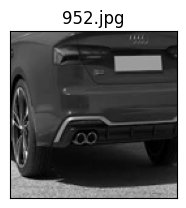

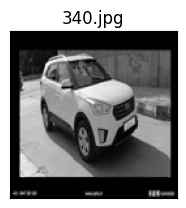

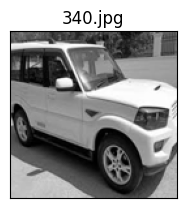

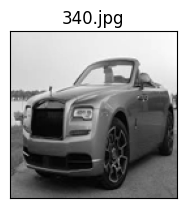

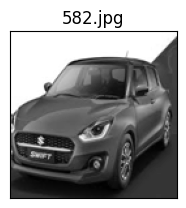

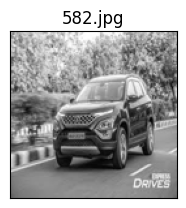

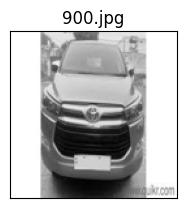

In [2]:
#Visualizing the Images (Code from 04.Dimension Reduction and Images)
%matplotlib inline
from matplotlib import pyplot as plt
# a helper plotting function 
def plot_gallery(images, titles, h, w, n_row=1, n_col=1):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Run the plot gallery with each of the sub arrays that have images for each type of vehicle (each row having one image )
plot_gallery(audi_images, ls_train[:num_audi], h, w, n_col=1)
plot_gallery(hyundai_images, ls_train[(num_audi):(num_audi+num_hyundai)], h, w, n_col=1)
plot_gallery(scorpio_images, ls_train[(num_audi+num_hyundai):(num_audi+num_hyundai+num_scorpio)], h, w, n_col=1)
plot_gallery(rollsroyce_images, ls_train[(num_audi+num_hyundai+num_scorpio):(num_audi+num_hyundai+num_scorpio+num_rollsroyce)], h, w, n_col=1)
plot_gallery(swift_images, ls_train[(num_audi+num_hyundai+num_scorpio+num_rollsroyce):(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift)], h, w, n_col=1)
plot_gallery(tata_safari_images, ls_train[(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift):(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift+num_tata_safari)], h, w, n_col=1)
plot_gallery(toyota_innova_images, ls_train[(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift+num_tata_safari):(num_audi+num_hyundai+num_scorpio+num_rollsroyce+num_swift+num_tata_safari+num_toyota_innova)], h, w, n_col=1)

### Data Reduction 
___________________________

**Linear Dimensionality Reduction of the Images using PCA** and **Visualization Explained Variance**

Principal Compnent Analysis is critical to apply to our dataset as it aims to reduce the number of variables while preserving as much information as possible. With a large dataset such as ours, applying PCA is a great statistical technique to help us explore and visualize the data in a lower-dimentional space. 

The library scikit-learn (sklearn) provides us with a PCA implementation that is easy to implement and is very efficient compared to manual calculation. First, in order to enure that all our variables will contribute equally to our analysis, we must standardize the data so it has a mean of 0 and a standard deviation of 1. Here, we used the StandardScalar class from sklearn, which standardize features by removing the mean and scaling to unit variance. Next, we apply PCA, which will calculate the covariance matrix, which represents the relationships between all our pairs of variables. Then, we fit the PCA model to our data using the .fit() method, which will calculate the prinicpal compnenets based on our dataframe. Note that this step requires us to use our transformed data, which we created by using the .transform() method, which projects the data on to the new principal component space. And finally, we can visualize our explained variance by using a function built into sklearn, explained_variance_ratio_. This will enable us to understand how much information is retained by each component in our dataset. 

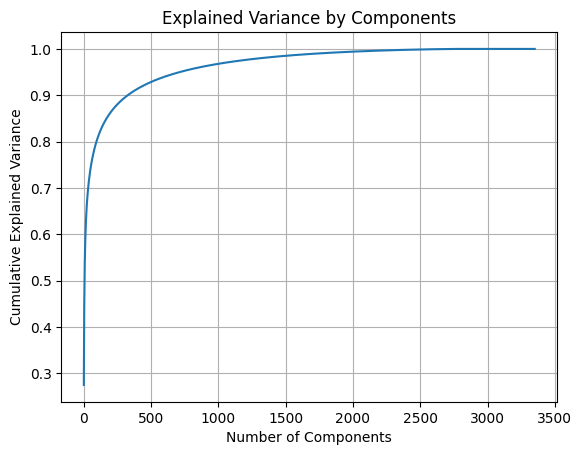

Number of components required to explain 95.0% of variance: 714


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_data_scaled = scaler.fit_transform(df_data)

# Apply PCA
pca = PCA()
pca.fit(df_data_scaled)

# Visualize explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Analyze dimensions required
threshold = 0.95  # Set a threshold for explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance > threshold) + 1
print(f'Number of components required to explain {threshold * 100}% of variance:', num_components)

# Credits to ChatGPT for helping with our understanding of where to set the threshold 

714 dimensions provides an adaquate compressed representation of our image data. 

As we can see by the graph above, reaching a 95% explained variance with 714 componenets suggests that these compononents capture a majority of the variability in our cars data. If we increased the number of components beyond this point, we will not be able to make any more substancial inferences upon our data. So, this insight allows us to make more informed decisions about how many principal components to retain for further analysis upon our data. By selecting just 714 components, we can reduce the dimentionality of our data while retaining most of the important features. 

**Linear Dimensionality Reduction of the Images using RPCA** and **Visualization Explained Variance**

Randomized Principal Component Analysis (RPCA) is a another technique for reducing the dimensionality of a dataset while preserving essential information. This method is particularly beneficial for large datasets, such as our own, as it offers computational efficiency without sacrificing accuracy.

The scikit-learn library provides an implementation of RPCA, making it easy to apply to our dataset. Before applying RPCA, it's essential to standardize the data to ensure that all variables contribute equally to the analysis. We can achieve this using the StandardScaler class from sklearn, which scales the features to have a mean of 0 and a standard deviation of 1. Once the data is standardized, we can proceed to apply RPCA, this time using the attribute 'randomized' for the solver. Now, we have to fit the RPCA model to our data using the .fit() method, which calculates the principal components based on the covariance matrix of the transformed data. Similar to PCA, RPCA requires the use of transformed data obtained through the .transform() method we used eariler. Finally, we follow the same steps as before with creating the graph, then we can visualize our explained variance.

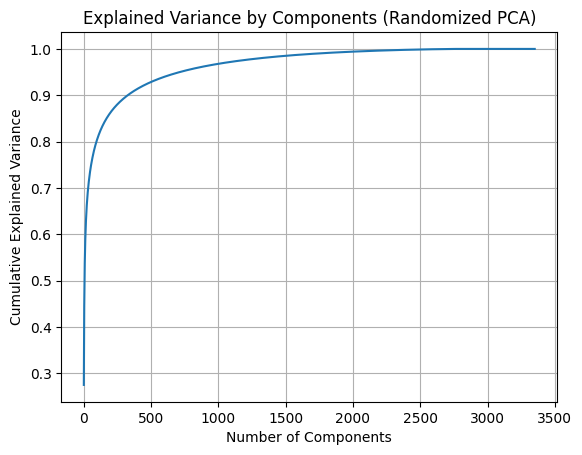

Number of components required to explain 95.0% of variance (Randomized PCA): 714


In [4]:
# Standardize the data
scaler = StandardScaler()
df_data_scaled = scaler.fit_transform(df_data)

# Apply Randomized PCA
randomized_pca = PCA(svd_solver='randomized') # use the 'randomized' solver 
randomized_pca.fit(df_data_scaled)

# Visualize explained variance
plt.plot(np.cumsum(randomized_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components (Randomized PCA)')
plt.grid(True)
plt.show()

# Analyze dimensions required
threshold = 0.95  # Set a threshold for explained variance
cumulative_variance_randomized = np.cumsum(randomized_pca.explained_variance_ratio_)
num_components_randomized = np.argmax(cumulative_variance_randomized > threshold) + 1
print(f'Number of components required to explain {threshold * 100}% of variance (Randomized PCA):', num_components_randomized)


Now using RPCA, we observe the same result of 714 componenents required to explain 95% of the variance, which is the same result we just saw using PCA. 

Given that both of the observations are the same, this indicates cosistency between the two dimensionality reduction techniques, and reinforces the confidence in our findings. And once again, both graphs illustrate that beyond 714 components, the increase in explained variance becomes marginal. Therefore, using 714 dimensions provides an adaquate representation of our data.

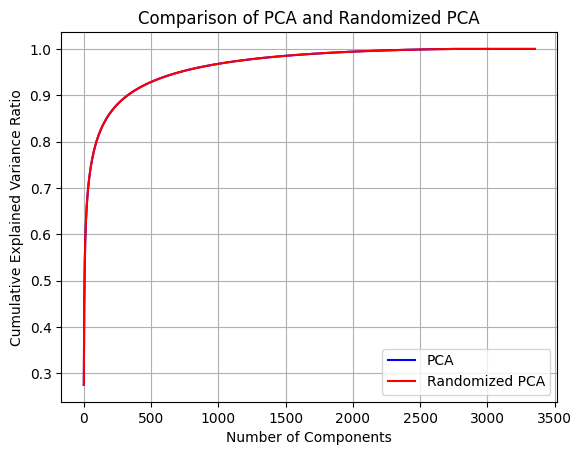

In [5]:
# Calculate explained variance ratio for PCA
pca = PCA()
pca.fit(df_data_scaled)
cumulative_variance_pca = np.cumsum(pca.explained_variance_ratio_)

# Calculate explained variance ratio for Randomized PCA
randomized_pca = PCA(svd_solver='randomized')
randomized_pca.fit(df_data_scaled)
cumulative_variance_randomized = np.cumsum(randomized_pca.explained_variance_ratio_)

# Compare performance
num_components = np.arange(1, len(cumulative_variance_pca) + 1)
plt.plot(num_components, cumulative_variance_pca, label='PCA', color='blue')
plt.plot(num_components, cumulative_variance_randomized, label='Randomized PCA', color='red')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Comparison of PCA and Randomized PCA')
plt.legend()
plt.grid(True)
plt.show()
